In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ad = pd.read_csv('advertising.csv')

In [3]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
ad.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
n = len(ad['TV'])
print('TV count is',n)

TV count is 200


In [9]:
n = len(ad['Radio'])
print('Radio count is',n)

Radio count is 200


In [10]:
n = len(ad['Newspaper'])
print('Newspaper count is',n)

Newspaper count is 200


# Exploratory Data Analysis

In [11]:
sns.set_style('darkgrid')

In [12]:
sns.set_palette('bwr_r')

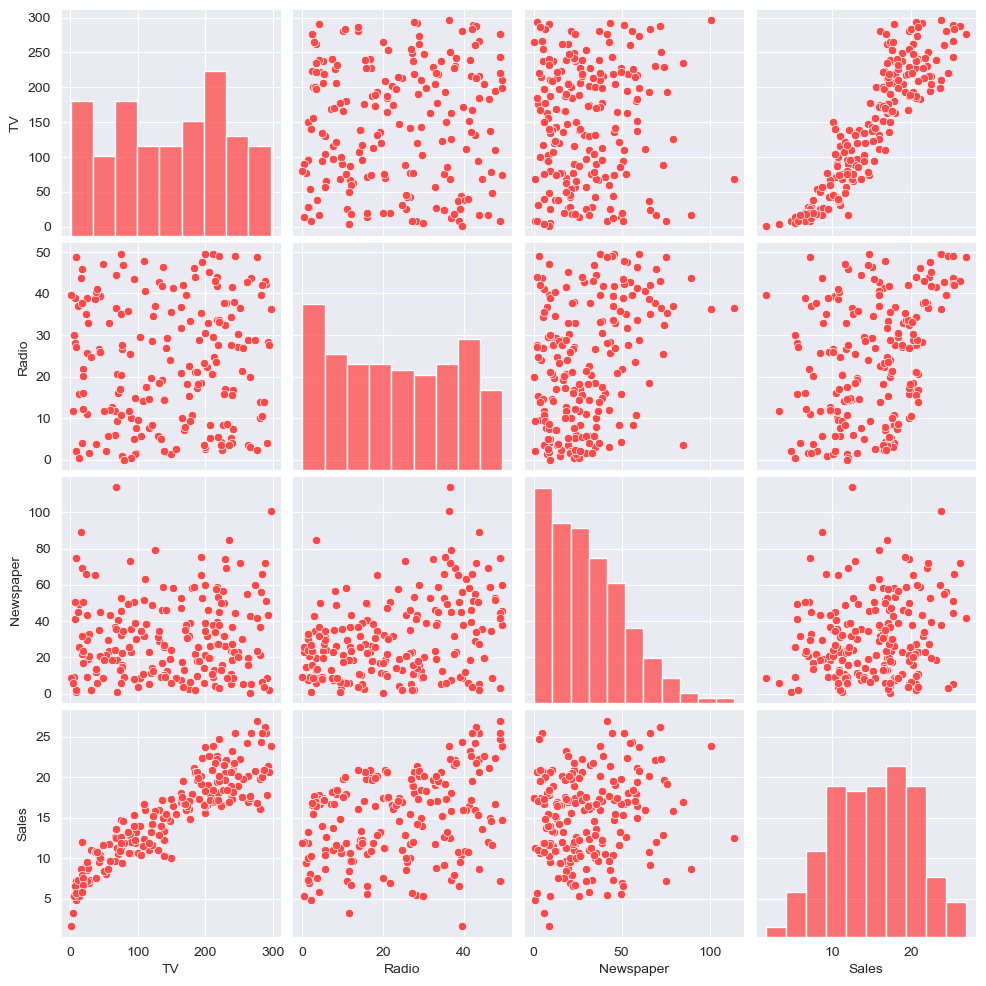

In [13]:
sns.pairplot(data = ad)

In [14]:
sns.set_palette('Oranges_r')

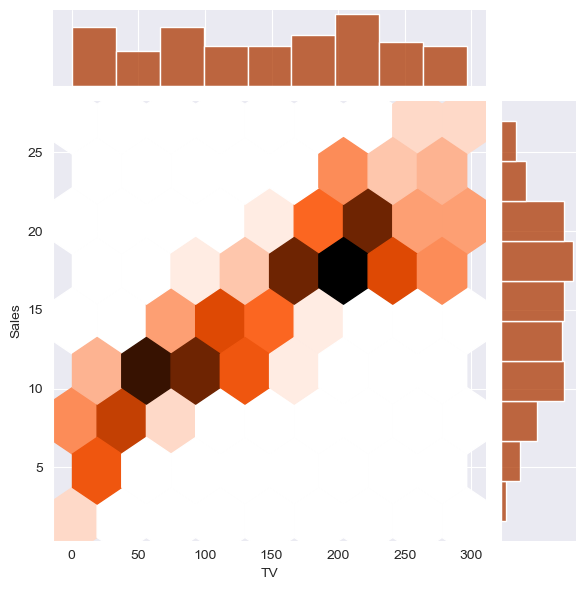

In [15]:
sns.jointplot(x = ad['TV'],y = ad['Sales'],kind= 'hex')

In [16]:
sns.set_palette('Pastel1')

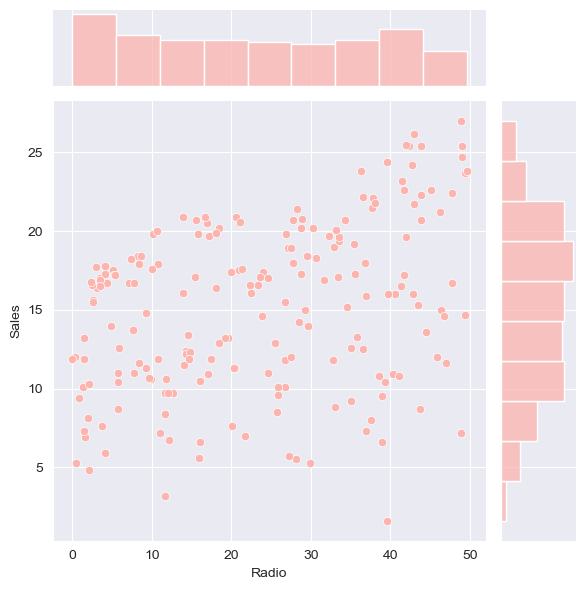

In [17]:
sns.jointplot(x = ad['Radio'],y = ad['Sales'],kind= 'scatter')

In [18]:
sns.set_palette('flare_r')

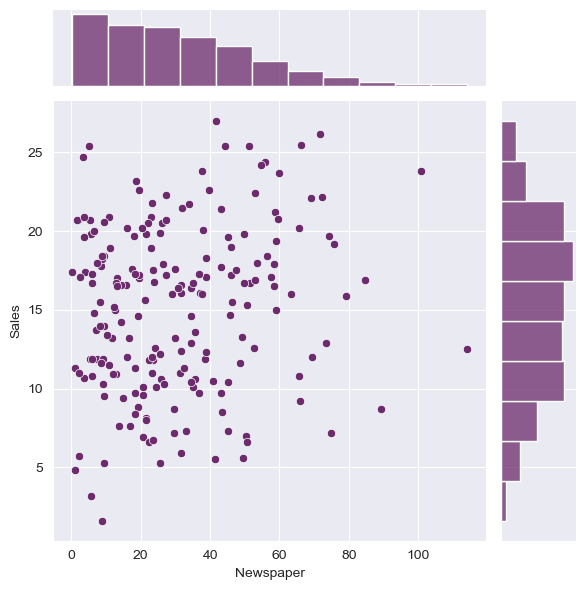

In [19]:
sns.jointplot(x = ad['Newspaper'],y = ad['Sales'],kind= 'scatter')

In [70]:
sns.set_palette('cividis')

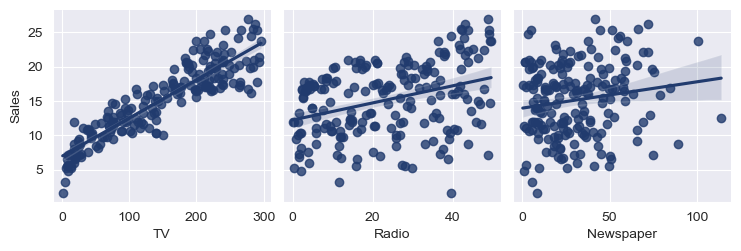

In [71]:
sns.pairplot(ad,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',aspect=1, kind='reg')

In [22]:
sns.set_palette('twilight_shifted_r')

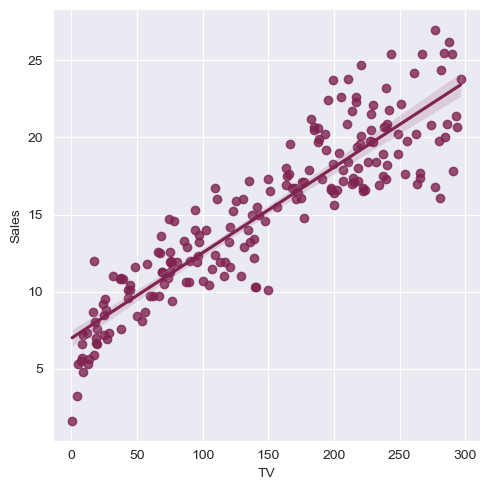

In [23]:
sns.lmplot(x = 'TV',y = 'Sales',data = ad)

In [24]:
corr_mat = ad.corr()
corr_mat

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

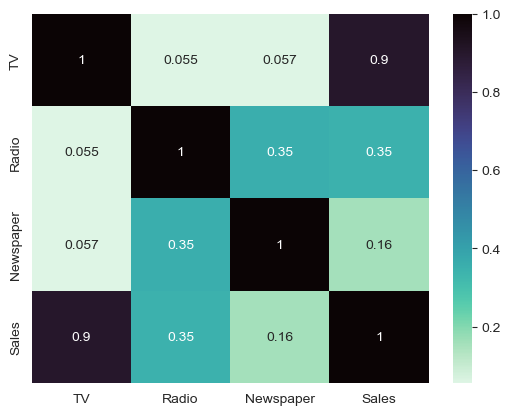

In [25]:
sns.heatmap(corr_mat,annot = True,cmap= 'mako_r')

# Model Prediction

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = ad.drop('Sales',axis = 1)
y = ad['Sales']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression()

In [32]:
predict_lm = model.predict(X_test)

In [33]:
print('Score:',model.score(X_test,y_test))

Score: 0.8972649704616219


In [34]:
print('Coefficients:\n',model.coef_)

Coefficients:
 [ 0.05493018  0.1095576  -0.00619422]


In [35]:
print('Intercept:\n',model.intercept_)

Intercept:
 4.681232151484297


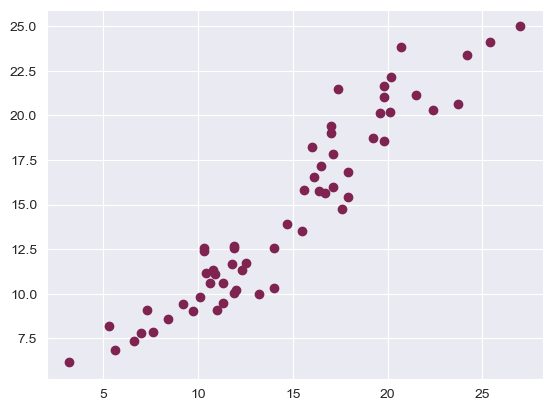

In [36]:
plt.scatter(y_test,predict_lm)

(array([1., 0., 2., 1., 3., 5., 0., 2., 7., 7., 4., 3., 7., 5., 1., 7., 1.,
        1., 2., 1.]),
 array([-4.05998282, -3.67409941, -3.288216  , -2.90233259, -2.51644918,
        -2.13056577, -1.74468235, -1.35879894, -0.97291553, -0.58703212,
        -0.20114871,  0.1847347 ,  0.57061812,  0.95650153,  1.34238494,
         1.72826835,  2.11415176,  2.50003518,  2.88591859,  3.271802  ,
         3.65768541]),
 <BarContainer object of 20 artists>)

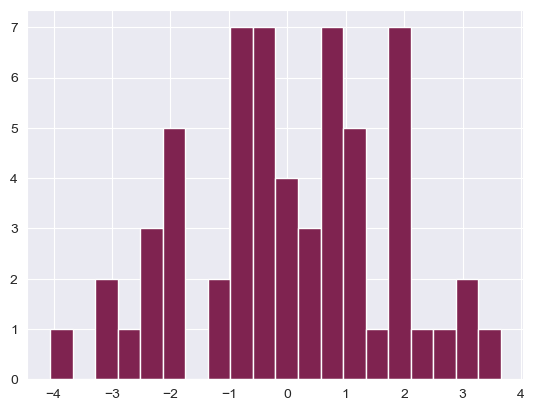

In [37]:
plt.hist(y_test-predict_lm,bins = 20)

# Model Evaluation

In [38]:
from sklearn import metrics

In [65]:
MAE = metrics.mean_absolute_error(y_test,predict_lm)
MSE = metrics.mean_squared_error(y_test,predict_lm)
MSE = metrics.mean_squared_error(y_test,predict_lm)
print(f"MAE:{MAE}")
print(f"MSE:{MSE}")
print(f"RMSE:{RMSE}")

MAE:1.3731200698367851
MSE:2.8685706338964962
RMSE:1.6936812152890102


## Rigde Regression

In [49]:
from sklearn.linear_model import Ridge

In [52]:
ridge_model = Ridge()

In [54]:
ridge_model.fit(X_train,y_train)

Ridge()

In [55]:
predict_rg = ridge_model.predict(X_test)

In [67]:
print('Score:',ridge_model.score(X_test,y_test))

Score: 0.8972654924463539


In [68]:
print('Coefficients:\n',ridge_model.coef_)
print('Intercept:\n',ridge_model.intercept_)

Coefficients:
 [ 0.05493015  0.10955357 -0.00619324]
Intercept:
 4.681301251219736


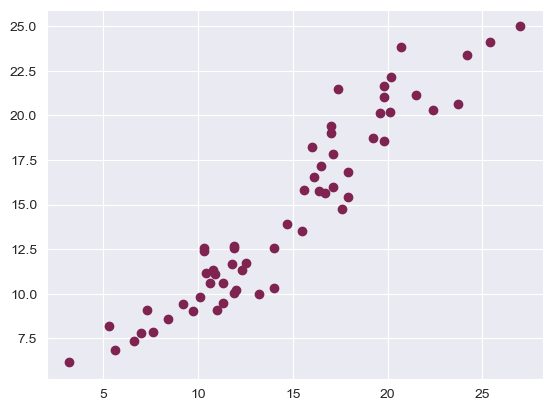

In [59]:
plt.scatter(y_test,predict_rg)

(array([1., 0., 2., 1., 3., 5., 0., 2., 7., 7., 4., 3., 7., 5., 1., 7., 1.,
        1., 2., 1.]),
 array([-4.05996249, -3.6740828 , -3.28820311, -2.90232342, -2.51644372,
        -2.13056403, -1.74468434, -1.35880464, -0.97292495, -0.58704526,
        -0.20116556,  0.18471413,  0.57059382,  0.95647351,  1.34235321,
         1.7282329 ,  2.11411259,  2.49999229,  2.88587198,  3.27175167,
         3.65763137]),
 <BarContainer object of 20 artists>)

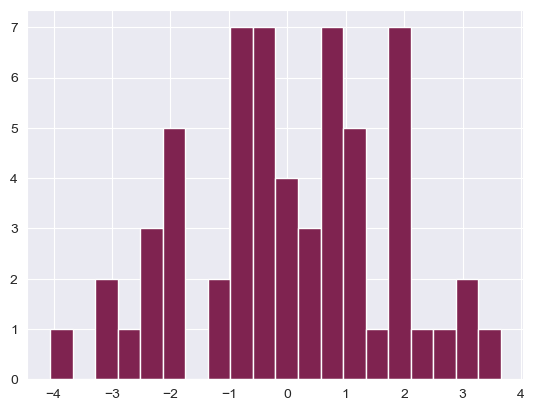

In [60]:
plt.hist(y_test-predict_rg,bins = 20)

In [64]:
MAE = metrics.mean_absolute_error(y_test,predict_rg)
MSE = metrics.mean_squared_error(y_test,predict_rg)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predict_rg))
print(f"MAE:{MAE}")
print(f"MSE:{MSE}")
print(f"RMSE:{RMSE}")

MAE:1.3731197133461241
MSE:2.868556059022858
RMSE:1.6936812152890102
